This notebook is centered around the data labeling process. It involves manually labeling the impact sentences. The sentences are categorized into six distinct variables, as detailed below and illustrated in the accompanying table:
- s_para_s: sentences from paragraphs that describe structural impact.
- s_para_c: sentences from paragraphs that describe community impact.
- s_para_n: sentences from paragraphs that describe structural & community impact.
- s_table_s: sentences from tables that describe structural impact.
- s_table_c: sentences from tables that describe community impact.
- s_table_n: sentences from tables that describe structural & community impact.

To ensure that the labeled sentences above correspond with those from the preprocessing file, it is advisable to use the text_body output for sentences extracted from paragraphs and the text_table output for sentences from tables, as processed in the 1_preprocessing step.

Please ensure to paste the input_path, which is the location of the output of the 01_input.ipynb file, at the start of this notebook. This step is the only requirement to load all necessary information for the execution of the code.

Recommended Google Colab Runtime Type: CPU (default).

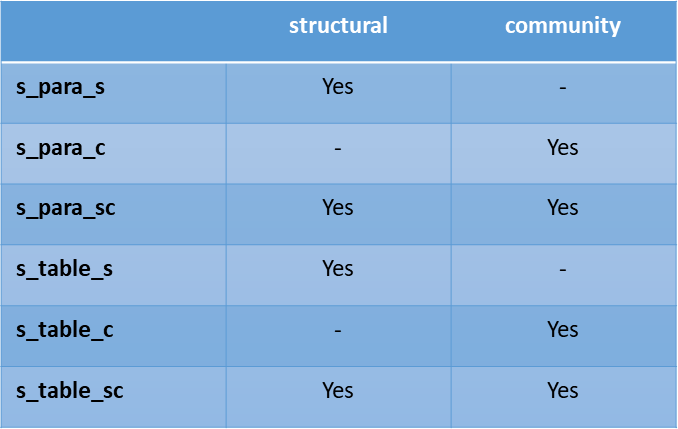

In [ ]:
# Specify the directory path where the output of this input file will be saved
input_path = "/content/drive/My Drive/ImpactDataMining/Hurricane_Otis/01_Input"

In [ ]:
s_para_struct = [
    'Acapulco experienced significant damage, especially to residential and high-rise buildings along the coast.',
    'About 80% of the hotels in Acapulco were damaged, and about 274,000 homes were destroyed in the region.',
    'The unprecedented scale of damage to single- and multi-story buildings in low-lying regions of Acapulco resulted in dramatic failures to multiple glazing, cladding, and roof surfaces.',
    'These failures extended to nearly every high-rise structure in the nearshore region.',
    'The impact of Otis on residential infrastructure, particularly the high-rise buildings along the coast, is starkly evident in aerial photographs of the city, showcasing significant damage to the facades of numerous structures.',
    'Figure 1.2 shows damage to the cladding of a tall building on the coast of Acapulco.',
    'The extensive nature of building cladding damage in high-rise engineered structures was of a severity making this event an outlier among recent hurricane impacts of the past two decades.',
    'Acapulco witnessed an unprecedented scale of damage to single- and multi-story buildings.',
    'In low-lying regions of Acapulco, high winds dominated the structural responses, inducing failures to multiple glazing, cladding, and roof surfaces.',
    'These failures extended to nearly every high-rise structure in the nearshore region.',
    'On the other hand, low-rise structures experienced significant roof damage as well as flooding caused by rainwater.',
    'In elevated regions of Acapulco, rainwater caused mudslides and foundation failures in single-story structures.',
    'Acapulco witnessed severe damage to residential structures.',
    'Aerial photographs of the residential area in Coyuca de Benitez (located approximately 16 miles northwest of Acapulco) revealed extensive damage to roofs, walls, foundations, and various structural and architectural features (Fig.4.1).',
    'The impact of blown-off roofs and walls led to widespread flooding inside houses due to water infiltration.',
    'The damage was associated with high wind loads on roofs and walls, floodwaters, and wind-borne debris.',
    'The extent of the damage to single-family residential homes in Acapulco is lacking at this point due to limited media coverage.',
    'Based on limited satellite imagery and a few social media posts, damage appears to be widespread but dependent on the structure type, with lower-income housing with wood framing and corrugated panels suffering widespread damage.',
    'There was unprecedented damage to the building envelopes (e.g., glazing and cladding) of many structures due to the wind loads, though the lateral force-resisting structural systems appeared to perform adequately.',
    'Some window failures would be expected due to wind-borne debris, but generally limited to the lower levels of the buildings.',
    'However, in this case, many buildings experienced total exterior glazing loss over the full height of the building.',
    'Many buildings now display damaged roofs, loss of glazing, and failure of exterior wall cladding as a result.',
    'Examples of modern high-rise residential buildings such as the recently completed Mare Acapulco Diamante (Fig.4.2), and the Diamante condominiums (Fig.4.3) show extensive loss of glazing over the entire exterior of the buildings.',
    'Despite the significant age gap, all displayed extensive levels of damage to multiple floors.',
    'Figure 4.4 shows three screenshots from a video of the damage caused to the Solar Ocean building.',
    'The first image shows a view from the unprotected balcony towards two adjacent buildings with similar exterior curtain wall failures.',
    'The middle image shows the interior of the unit with all glazing missing, severe damage to the ceiling and interior walls, and water damage to all contents of the dwelling unit.',
    'The third image shows an exterior view confirming the exterior failure over the full building height.',
    'Figure 4.5 shows the interior of the Princess Mundo Hotel, which lost the roof glazing over the large atrium.',
    'The Galerias Mall is one of the most severely damaged structures in the aftermath of Hurricane Otis (Fig.4.6).',
    'The shopping mall encompasses commercial and shopping stores that experienced substantial damage to its roof, curtain walls, and glass cladding panels.',
    'Light framed commercial properties along the coastline in Puerto Marqués Bay provide evidence of damage due to wind and breaking waves (Fig.4.7).',
    'In addition, the Arena GNP Seguros (Fig.4.8) suffered severe wind damage.',
    'Reports of road washouts were common in the more mountainous regions surrounding Acapulco, e.g., in the municipality of Kilmetro 42, Guerrero, Mexico, part of a road washed away (Fig.5.1).',
    'Although the road signs and power poles were severely damaged, the “stand-alone” untethered tower in the background appears to be intact.',
    'The trees on the right-hand side of the photo appear to be debarked.',
    'Neither of these facilities appears to have suffered any structural damage during the hurricane.',
    'While high winds dominated glazing and cladding failures in nearshore regions of Acapulco, rainwater and flooding caused significant geotechnical damage in elevated regions.',
    'At the road level, floodwaters caused mudslides that resulted in partial or full collapse of road lanes.',
    'Figure 6.2 presents a case where the edge of the road collapsed due to slope failure.',
    'Furthermore, residential structures located uphill around Acapulco were severely affected by soil failures caused by moving floodwaters.',
    'A number of these structures appear to rely on inadequate foundation support.',
    'As an example, Figure 6.3 shows a slope failure that resulted in the foundation collapse of a one-story residential structure.',
    'This section aims to provide some insights into how Hurricane Otis affected manmade (levees, seawalls, jetties, etc.)',
    'No significant damages have been reported in any of the hard coastal infrastructure (seawalls, port platforms, etc.)',
]
s_para_comm = [
    'Over half a million electricity consumers were affected.',
    'Meanwhile, roads, ports and air transit were disrupted, limiting egressing and access to the affected coastal city.',
    'The hurricane led to a reported 45 casualties and an estimated $15 billion in damage.',
    'One of the hardest-hit areas was the popular beach resort city of Acapulco, located on the Pacific coast of Mexico in the state of Guerrero.',
    "The hurricane also took a toll on the region's essential services and infrastructure.",
    "The electric grid was severely affected, leaving 513,544 customers in the State of Guerrero without power in the aftermath of the hurricane's landfall.",
    "While efforts to restore power made progress, as of October 31, Mexico's Federal Electricity Commission reported that only 75% of the affected areas had their electricity service reinstated (CFE, 2023a).",
    "The hurricane's impact extended to communication networks as well, with phone lines and cellular phone service in the region being disrupted for a significant period, complicating emergency response and coordination.",
    'About 120 hospitals and 33 schools in the region were reported as damaged due to the hurricane event.',
    'As a result of these and other related factors, the Ministry of Education of Guerrero (SEG) decided to temporarily suspend academic activities in Acapulco and Coyuca de Benitez from October 30 to November 3 (Reliefweb, 2023).',
    'Furthermore, road closures and the inability to access the airport due to landslides created additional challenges, causing delays in planned government and military interventions in the affected areas.',
    "Acapulco's ports were forced to close during the hurricane, disrupting not only local trade and transportation but also the city's economic activities, which rely heavily on tourism.",
    'Reports emerged of a shortage of food and drinking water following the hurricane, primarily due to the late arrival of aid and insufficient supplies.',
    'Many grocery stores remained closed, severely limiting access to essential food items and leaving residents in a precarious position (Mega et al., 2023).',
    "The financial implications of the hurricane's devastation are substantial.",
    'According to Enki Research, the cost of Hurricane Otis could potentially reach as high as $15 billion, underlining the extensive damage and disruption caused by this hurricane (Romero and Ore, 2023).',
    'Additionally, one of the most salient impacts of the hurricane has been the widespread displacement of families.',
    'It was estimated that approximately 250,000 families have been left homeless because of Hurricane Otis, according to Mexico’s President Andrés Manuel López Obrador (Rivera, 2023).',
    'High winds and flooding pose a significant risk to the impacted community.',
    'Tragically, preparedness, early warnings, and effective evacuations, which could have helped minimize the casualties, were all absent during this event.',
    'The government suspended electricity payments from November 2023 to February 2024 and called for the delivery of basic foods to the estimated 250,000 families impacted by the event.',
    'Hurricane Otis, unfortunately, followed this pattern, resulting in a significant human toll.',
    'According to the Governor of Guerrero state, 45 people died and 47 are missing as of October 31 (Cohen, 2023).',
    'Notably main roads connecting Acapulco to the interior of Mexico, e.g., Mexico City, were blocked by debris and landslides; the port was inoperable, and the airport was closed.',
    'All means for leaving or supplying the affected region after the hurricane were extremely limited.',
    'The cranes and helicopters were needed to repair fallen towers and lines in hard-to-access terrain.',
    'In addition, the main highway between Acapulco and Mexico City was inaccessible.',
    'As of November 7, locals reported that about 50% of the roads were accessible but with military restrictions.',
    'Only the military, aid vehicles, Mexican media, and people showing residency in Acapulco are allowed to enter Acapulco under military escort.',
    'Roadway damage also limited access to critical facilities such as the Acapulco Airport whose entrance road was blocked by debris (Fig.5.2).',
    'On the evening of November 2, CFE posted on X (formerly known as Twitter) that the electricity had been restored to the airport.',
    'Early reports by CFE stated that the airport did not have electricity and it was closed.',
    'Significant disruptions to the transportation system occurred due to several rockslides above the Chilpancingo-Acapulco highway, as shown in Figure 6.1.',
]
s_para_both = [
    "According to the governor of Guerrero, the hurricane caused damage to 80% of the hotels in Acapulco, a devastating blow to the city's tourism industry (Mega et al., 2023), with another approximately 274,000 houses destroyed (Reliefweb, 2023).",
    'According to the United Nations Office for the Coordination of Humanitarian Affairs on October 26th, roads were so severely damaged that communities in the Acapulco area could not be accessed for restoration and recovery efforts.',
]

In [ ]:
s_table_struct = [
      'Extensive damage to building inventory, including roof failures, wall collapse, foundation failure due to landslides, and wind and water damage to various structural and architectural elements.',
    'Significant damage to the building envelope such as glazing observed in many hotels and condominiums, both along the shoreline and further inland.',
    'This resulted in almost total damage to the non-structural elements inside the buildings through wind and rain damage.',
    'No structural system failures were observed in these multi-story residential buildings.',
    'Building envelope (e.g., cladding) damage was observed in various buildings.',
    'Minor structural damage was observed at Galerias Diana shopping mall and low-rise light-framed commercial buildings.',
    'No widespread damage was reported, but video evidence showed strong winds blowing inside a hospital in Acapulco.',
    'Significant damage to roof panels by high winds was reported in several communities;flooding of some schools was also reported.',
    'Roof damage was observed in historical buildings.',
    'This region consists of residential houses, where the majority of the houses exhibit moderate to significant damage to their roofs and walls.',
    'The area with the most significant damage, including hotels, condominiums, and Arena GNP Seguros.',
    'Severe damage was observed to building envelopes (e.g., cladding) for hotels, condominiums, stores, and other buildings in this area.',
    'It was noted on October 29th, that 10,083 power distribution poles had been knocked down by the hurricane (CFE Bulletin, 2023c).',
    'Failure of the exterior windows at the airport control tower resulted in water and wind damage to equipment and furniture in the tower.',
]
s_table_comm = [
    'On October 26, out of 513,524 users affected, CFE restored 281, 740 (CFE Bulletin, 2023b).',
    'By October 31, CFE reported restoration of 75% of the 513,525 initial outages for Guerrero (CFE, 2023a).',
    'Acapulco originally had 284,670 outages, of which 55% (156,569) were restored.',
    'The Zihuatanejo Airport was evacuated by the authorities on October 26 (UNOCHA, 2023).',
    'It is unknown how much effect this had on air traffic control after the storm.',
    'The main highway between Mexico City and Acapulco could not be accessed, which hampered electric power restoration on October 26 (UNOCHA, 2023).',
    'CFE also reported problems with power restoration due to landslides blocking roads on October 26 (CFE, 2023b).',
    'Water and sanitation systems were damaged, and the municipal water system was not operating due to power outages as reported on October 26 (UNOCHA, 2023).',
    'Electricity and telecommunications were disrupted in the port area of Acapulco (UNOCHA, 2023).',
    'CFE reports 513,524 outages out of 1.4 million users in the state, which is 36.6 % of the population.',
    'CFE reported outages of 284,670 on October 26, of which 75% were restored by October 31.',
    'The Port of Acapulco and Zihuatanejo Airport also lost power.',
    '(It is not clear if these are included in the 284,670 above).',
    'That is, the number of users will permanently decline.',
]
s_table_both = [
      'According to the CFE Bulletin of October 30, 12 water pumps that were damaged in the hurricane were energized (CFE, 2023d).',
    'It is noted that although power may be restored to a region, if buildings are sufficiently damaged that they cannot receive power, the outage may never be restored.',
]

The following section compiles all previously defined inputs and saves them. Therefore, there is no need to make any edits beyond this point.

In [ ]:
import os
import json
import pandas as pd

from google.colab import drive

In [ ]:
def current_path():
  print("Current working directory")
  print(os.getcwd())
  print()

current_path()
drive.mount('/content/drive')
os.chdir(input_path)
current_path()

Current working directory
/content

Mounted at /content/drive
Current working directory
/content/drive/My Drive/ImpactDataMining/Hurricane_Otis/01_Input



In [ ]:
# Saving annotated data to an excel file
df1 = pd.DataFrame(s_para_struct+s_table_struct)
df2 = pd.DataFrame(s_para_comm+s_table_comm)
df3 = pd.DataFrame(s_para_both+s_table_both)

with pd.ExcelWriter('4_data_labeling.xlsx', engine='openpyxl') as writer:
    df1.to_excel(writer, sheet_name='labeled_data_struct', index=False, header=False)
    df2.to_excel(writer, sheet_name='labeled_data_comm', index=False, header=False)
    df3.to_excel(writer, sheet_name='labeled_data_both', index=False, header=False)

In [ ]:
# Saving results to a JSON file
with open('4_data_labeling.json', 'w') as file:
    json.dump(
        {'labeled_data_struct': s_para_struct+s_table_struct,
         'labeled_data_comm': s_para_comm+s_table_comm,
         'labeled_data_both': s_para_both+s_table_both}, file
        )